MSE train : 1.724, test : 13.914
MSE train : 0.980, test : 0.833


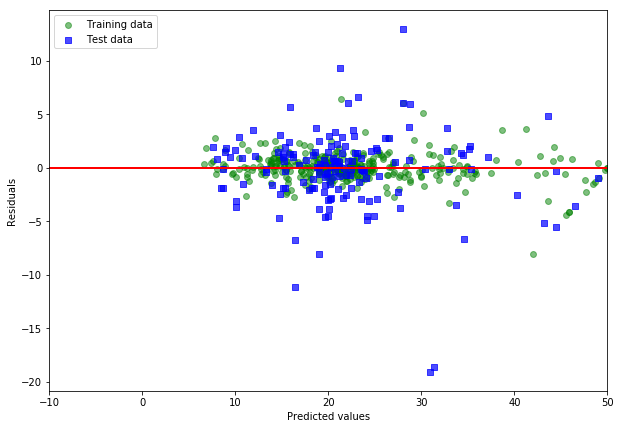

In [12]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )

# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'green', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()